In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot import *
Iris2D1_train = np.loadtxt("Iris2D1_train.txt")
Iris2D1_test = np.loadtxt("Iris2D1_test.txt")
Iris2D2_train = np.loadtxt("Iris2D2_train.txt")
Iris2D2_test = np.loadtxt("Iris2D2_test.txt")

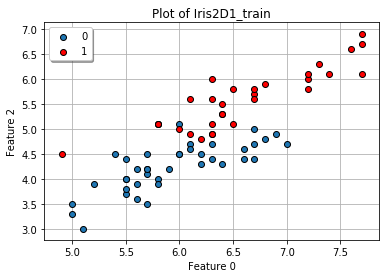

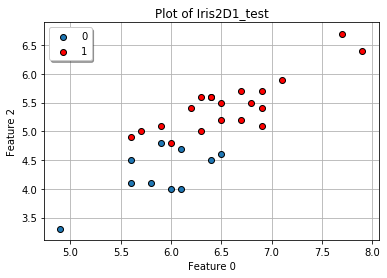

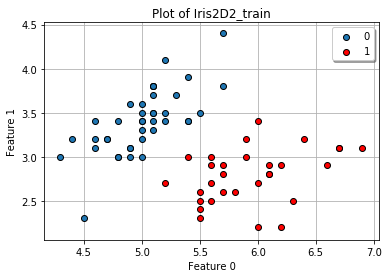

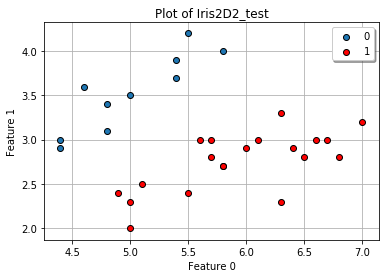

In [2]:
def plot_iris(data, name):
    if "2D1" in name:
        y = "Feature 2"
    else:
        y = "Feature 1"
    
    plt.scatter(data[data[:,2] == 0][:, 0], data[data[:,2] == 0][:, 1], ec = "black", label = 0, zorder = 3)
    plt.scatter(data[data[:,2] == 1][:, 0], data[data[:,2] == 1][:, 1], ec = "black", color = 'red', label = 1, zorder = 3)
    plot_template(title = "Plot of " + name, xlabel = "Feature 0", ylabel = y, equal_axis=False, legend= True, save = False)

plot_iris(Iris2D1_train, "Iris2D1_train")
plot_iris(Iris2D1_test, "Iris2D1_test")
plot_iris(Iris2D2_train, "Iris2D2_train")
plot_iris(Iris2D2_test, "Iris2D2_test")
#the two classes are very distinctly separated in the Iris2D2 datasets while there is a little overlap in the Iris2D1 datasets

In [46]:
def logistic(x):
    out = 1/(1 + np.exp(-x))
    return out

def add_one(X):
    row, col = np.shape(X)
    one_col = np.ones(row)
    X = np.c_[one_col, X]
    return X

def gradient(X, y, w):
    """
    Returns a vector of partial derivaties
    """
    s = -y.T * (w.T @ X.T) # Transpose to get 1*d @ d*N
    theta = logistic(s) # 1*N
    c =  -y * X # N*d
    grad = c.T @ theta.T # Transpose to d*N @ N*1
    return grad

def insample_error(X, y, w):
    """
    Returns a single real value which corresponds to the error
    """
    N = len(X)
    s = -y.T * (w.T @ X.T) # Transpose to get 1*N x 1*d @ d*N
    pyx = np.log(1 + np.exp(s)) # Calculate P(Yn|Xn)
    error = np.sum(pyx)/N # Calculate sum[P(Yn|Xn)]/N
    return error

def train_log(X, y):
    X = add_one(X)
    N, d = np.shape(X)
    w = np.reshape(np.random.randn(d), (d, 1))
    error = insample_error(X, y , w)
    learning_rate = 0.01
    iteration = 1
    convergance = 0
    tolerance = 10**-10
    
    while convergance == 0:
        m = gradient(X, y, w)
        g = np.linalg.norm(m)
        w_new = w - (learning_rate * m)
        new_error = insample_error(X, y, w_new)
        iteration += 1
        
        #check if new error is better
        if new_error < error:
            w = w_new
            error = new_error
            learning_rate *= 1.1
        else:
            learning_rate *=0.9
        
        #check convergance condition
        if g < tolerance:
            print("Tolerance reached")
            convergance = 1
        elif iteration == 10000:
            print("Max iterations")
            convergance = 1
    return w
    
def predict_log(X, w):
    X = add_one(X)
    pred = logistic(w.T @ X.T).T
    pred = pred > 0.5
    pred = np.array(pred, dtype = int)
    return pred

def get_error(true, pred):
    N = len(true)
    error = abs(true - pred)
    error = np.sum(error)/N
    return error

def split_data(data):
    x = data[:, :2]
    y = data[:, -1:]
    y = 2*(y-0.5)
    return x, y

def log_regression(train, test):
    train_x, train_y = split_data(train)
    test_x, test_y = split_data(test)
    weights = train_log(train_x, train_y)
    pred = predict_log(test_x, weights)
    error = get_error(test_y, pred)
    return error, weights

In [61]:
e1, w1 = log_regression(Iris2D1_train, Iris2D1_test)
e2, w2 = log_regression(Iris2D2_train, Iris2D2_test)
print(f"Iris2D1 Error: {e1}\nIris2D1 Weights:\n{w1}")
print(f"Iris2D2 Error: {e2}\nIris2D2 Weights:\n{w2}")

Max iterations
Max iterations
Iris2D1 Error: 0.43333333333333335
Iris2D1 Weights:
[[-13.03257977]
 [ -4.57969332]
 [  8.42735797]]
Iris2D2 Error: 0.3333333333333333
Iris2D2 Weights:
[[-28.94527216]
 [ 12.65208889]
 [-12.69343274]]


In [9]:
weights = train(x, y)
t_x, t_y = split_data(Iris2D1_test)
pred = predict(t_x, weights)
error = error(t_y, pred)
error

Max iterations
[[0.28272154]
 [0.59097422]
 [0.46913641]]
0.8057735267838846


0.43333333333333335

In [8]:
Iris2D1_train = np.loadtxt("Iris2D1_train.txt")
x, y = split_data(Iris2D1_train)
d = np.shape(x)[1]
w = np.reshape(np.random.randn(d), (d, 1))
gradient(x, y, w)\
#insample_error(x,y,w)

array([[236.25668179],
       [169.14329519]])

In [119]:
np.random.randn(19)
train_x_2d1, train_y_2d1 = split_data(Iris2D1_train)
#train(train_x_2d1, train_y_2d1)

In [93]:
x = add_one(Iris2D2_train[:, :2])
y = Iris2D2_train[:, -1:]
w = np.reshape(np.random.randn(len(x)), (70, 1))
#s = y @ w.T @ x
#sum(np.log(1 + np.exp(-s)))
#Iris2D2_train

In [121]:
x = train_x_2d1
y = train_y_2d1
w = np.reshape(np.random.randn(np.shape(x)[1]), (np.shape(x)[1], 1))
#logistic(y @ w.T @ x)
y * (w.T @ x.T)

array([[ 6.31352151,  5.70893406,  7.65324077,  7.55041377,  6.45792455,
        -8.82158169,  7.30974203, -9.66684087, -7.41986941,  6.36165586,
        -9.44002782, -7.64668246,  6.61618627, -8.14844291,  7.91432948,
        -7.88735419, -7.82536117,  6.63660325,  7.92818816, -9.2817661 ,
        -8.26512859,  6.65046193,  7.11064634, -7.55041377,  7.28932505,
         6.38207284,  5.80520275, -7.2346324 , -8.31326294,  6.71901327,
         7.17919768,  6.88383329,  7.78378512,  6.16256016,  6.86341631,
        -7.2346324 ,  7.39945242,  6.49220021, -8.21699424,  7.2411907 ,
         6.34779717, -7.92162986,  8.03101516,  7.3440177 , -9.03453606,
        -7.2346324 , -7.38559374,  7.63938208, -7.82536117,  7.55697207,
         7.11064634, -9.04839474,  6.45792455, -8.07989158,  6.70515459,
        -8.86971604, -8.725313  ,  8.04487384, -7.81150249, -6.20413621,
         6.65702024,  7.27546637,  6.67087892, -7.72253417, -9.57057218,
        -7.35131808,  6.71901327,  7.45414507, -8.4

In [189]:
y = Iris2D2_train[:, -1:]
y = 2*(y-0.5)

(w.T @ x.T) * y.T

array([[-6.31352151, -5.70893406, -7.65324077, -7.55041377,  6.45792455,
         8.82158169,  7.30974203,  9.66684087,  7.41986941, -6.36165586,
        -9.44002782,  7.64668246,  6.61618627,  8.14844291,  7.91432948,
         7.88735419, -7.82536117,  6.63660325,  7.92818816,  9.2817661 ,
        -8.26512859, -6.65046193, -7.11064634,  7.55041377,  7.28932505,
         6.38207284, -5.80520275,  7.2346324 , -8.31326294,  6.71901327,
        -7.17919768,  6.88383329,  7.78378512,  6.16256016,  6.86341631,
         7.2346324 , -7.39945242, -6.49220021, -8.21699424, -7.2411907 ,
         6.34779717,  7.92162986,  8.03101516,  7.3440177 , -9.03453606,
        -7.2346324 ,  7.38559374,  7.63938208, -7.82536117,  7.55697207,
         7.11064634,  9.04839474,  6.45792455,  8.07989158,  6.70515459,
        -8.86971604, -8.725313  , -8.04487384, -7.81150249, -6.20413621,
         6.65702024,  7.27546637,  6.67087892, -7.72253417,  9.57057218,
        -7.35131808,  6.71901327, -7.45414507, -8.4